In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

In [2]:
# DATA 
import pandas as pd
cwd = os.chdir('/Users/jackcarter/Missoula/Missoula Data/Missoula Data Final /Moses Coulee')
dfa1 = pd.read_csv("e_b1_data_y.csv")

In [3]:
age1 = dfa1['Age'].values


age1_er = dfa1['Age_Er'].values


ar391 = dfa1['Ar39_'].values



In [4]:
dfa1.tail()

,Age,Age_Er,Ar40_,Ar40_Er,Ar39_,Ar39_Er,Pwr_Achieved,Dur_Heating_At_Req_Pwr,Run_Date,temp,temp_err,time,Da2,Da2_err
46,142.5578,1.744403,1.287607,0.003313,0.129629,0.000085,811,600,9/28/2019,810.905085,0.424636,597.386,0.000115,9.250000e-08
47,169.5786,2.409806,1.086960,0.003335,0.091524,0.000085,826,600,9/28/2019,825.204237,0.863049,596.812,0.000195,9.250000e-08
48,220.0793,7.484058,0.479066,0.003362,0.029270,0.000086,842,600,9/29/2019,837.866949,3.537976,596.887,0.000200,9.250000e-08
49,338.0175,38.273470,0.148285,0.003327,0.005357,0.000074,867,600,9/29/2019,867.014407,0.381915,596.877,0.000090,9.250000e-08
50,398.4262,27.093010,0.293744,0.003418,0.007687,0.000081,886,600,9/29/2019,886.022034,0.286188,596.887,inf,9.250000e-08


In [5]:
"""
Models
"""
cwd = os.chdir('/Users/jackcarter/Missoula/Missoula outputs')
df_arr = pd.read_csv("mc_eb1_arr.csv")
df_age = pd.read_csv("mc_eb1_age.csv")
Z1 = df_arr['arr_model'].values
Z2 = df_age['age_model'].values
age_m_low1 = df_age['age_model_low'].values
age_m_high1 = df_age['age_model_high'].values
frel_model1 = df_age['frel_model'].values


In [6]:
df_age.head()

,Unnamed: 0,age_model,age_model_low,age_model_high,frel_model
0,0,202.206005,198.260442,206.074499,0.005951
1,1,210.389004,202.618672,218.429913,0.012636
2,2,222.321308,213.906773,230.726173,0.021339
3,3,220.082157,207.044778,232.911706,0.028869
4,4,231.294276,221.790330,240.593768,0.037585


In [7]:
def cumrel(x): 
    y = np.cumsum(x)
    z = y/y.max()
    return z
crel1 = cumrel(ar391)


In [8]:
# Plotting parameters Data

age_p1 = np.insert(age1,
                     0, age1[0])
age_p_err1 =  np.insert(age1_er, 
                         0, age1_er[0])
ar39_plot_1 = np.insert(crel1,
                      0, 0)


In [9]:
# Plotting parameters Model

age_m_low1 = np.insert(age_m_low1,
                     0, age_m_low1[0])
age_m_high1 = np.insert(age_m_high1,
                     0, age_m_high1[0])
ar39_m_1 = np.insert(frel_model1,
                      0, 0)

In [10]:
"""
Arrhenius 
"""
da2 = dfa1['Da2'].values
temp = dfa1['temp'].values

In [11]:
# Part 1 ThermoCouple T Calibration 
## Step 1: Pyrometer Calibration
import os 
cwd = os.getcwd()
os.chdir("/Users/jackcarter/Desktop/Downloads")
df1 = pd.read_csv("PyroApril2018.csv")
c1 = df1.iloc[:,0:1]
c2 = df1.iloc[:,1:2]
x1 = c1.values
x2 = c2.values
x1 = x1[x1 >=0]
x2 = x2[x2 >=0]
ThermoT = x2
PyroT = x1
zpt = np.polyfit(x1,x2,3)


In [12]:
temp = np.polyval(zpt, temp)
tempk = temp + 273.15

In [13]:
tplot = 10000/tempk
N = da2.shape[0]
arr_data = np.log(da2)

In [14]:
tempk.shape

(51,)

In [15]:
"""
Data

"""
num_bins = 100 
counts_age1, bin_edges_age1 = np.histogram(age1, bins = num_bins, 
                                density = True)
cdf1 = np.cumsum(counts_age1)
"""
Model

"""

counts2_ab1_m, bin_edges2_ab1_m = np.histogram(Z2, bins = num_bins, 
                                density = True)
cdf1_m = np.cumsum(counts2_ab1_m)


/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


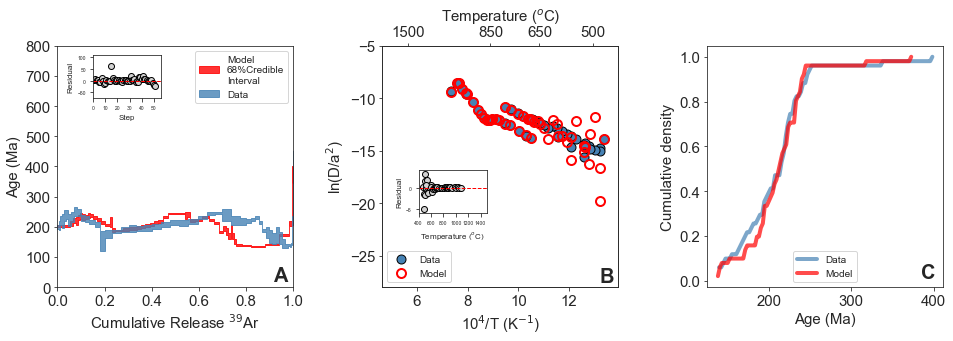

In [16]:
sns.set_style('ticks')

font= {"family": "Arial", 
      "weight": "normal",
      "size":15}

plt.rc("font", **font)


fig, ax = plt.subplots(1,3, figsize = (13.5, 5))

ax[0].fill_between(ar39_plot_1, age_m_low1, 
                 age_m_high1, 
                 alpha = 0.8, 
                color = 'r', 
                label = 'Model\n68%Credible\nInterval', 
                  step = 'pre', 
                  interpolate = True,  
                  lw = 1)


ax[0].fill_between(ar39_m_1, 
                age_p1 + 2*age_p_err1, 
                age_p1 - 2*age_p_err1, 
                color = 'steelblue', 
                step = 'pre', 
                    label = 'Data', 
                  alpha = 0.8)


ax[0].set_xlabel('Cumulative Release $^{39}$Ar')
ax[0].set_ylabel('Age (Ma)')




ax[1].plot(tplot[0:N-1], arr_data[0:N-1], 
          'o', markerfacecolor = 'steelblue', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')


ax[1].plot(tplot[0:N-1],Z1, 'or',
             markerfacecolor = 'None',
            alpha = 1, 
             markeredgecolor = 'r', markeredgewidth = 2, 
            markersize = 9, 
            label = 'Model')


#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([500,  650, 850,  1500])
Tp = 10e3/(Tdc + 273.15)
labels = list(['500', '650', '850',   
              '1500'])
ax2.plot(tplot[0:N-1], arr_data[0:N-1], alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')

ax[1].set_xlim(Tp.min() - 1, Tp.max()+ 1)
ax2.set_xlim(Tp.min() - 1, Tp.max()+ 1)
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


ax3 =plt.axes([0.44,0.38,0.07,0.12])

ax3.plot(tempk[0:N-1] - 273.15,
         Z1 - arr_data[0:N-1], 'ok', 
        markeredgecolor = 'k', 
        markerfacecolor = 'lightgrey')
qqq = Z1 - arr_data[0:N-1]
ax3.axhline(0, lw = 1, ls = '--', 
           color = 'r')
ax3.set_ylabel('Residual', fontsize = 8)
ax3.set_xlabel('Temperature ($^{o}$C)', fontsize = 8)
ax3.set_ylim(qqq.min() - 1, qqq.max() + 1)
ax3.tick_params(labelsize = 5)
ax3.locator_params(axis='x', nbins=6)
ax3.set_xlim(400, 1500)

ax[1].set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax[1].set_ylabel('ln(D/a$^{2}$)')
ax[1].locator_params(axis='y', nbins=6)
ax[1].locator_params(axis='x', nbins=6)


ax4 =plt.axes([0.105,0.7,0.07,0.12])

ax4.plot(np.linspace(1, N, N).astype(int), Z2 - age1, 'ok', 
        markeredgecolor = 'k', 
        markerfacecolor = 'lightgrey')
qqq2 = Z2 - age1
ax4.set_ylim(qqq2.min() - 50, qqq2.max() + 50)

ax4.axhline(0, lw = 1, ls = '--', 
           color = 'r')
ax4.set_ylabel('Residual', fontsize = 8)
ax4.set_xlabel('Step', fontsize = 8)
ax4.tick_params(labelsize = 5)
ax4.locator_params(axis='x', nbins=10)
ax4.set_xlim(0, N+5)
ax[0].set_ylim(0, 800)
ax[0].set_xlim(0, 1)

ax[0].legend(loc = 1, fontsize = 10)
ax[1].legend(loc = 3, fontsize = 10)


ax[2].plot(bin_edges_age1[1:], cdf1/cdf1[-1], 
        label = 'Data', 
        lw = 4,
        color = 'steelblue',
        alpha = 0.7)
ax[2].plot(bin_edges2_ab1_m[1:], cdf1_m/cdf1_m[-1], 
        label = 'Model', 
        lw = 4,
        color = 'red',
        alpha = 0.7)

ax[2].legend(fontsize = 10, loc = 8)
ax[2].set_xlabel('Age (Ma)')
ax[2].set_ylabel('Cumulative density')

s1 = 'A'
s2 = 'B'
s3 = 'C'

ax[0].text(0.92, 20, s1, fontweight = 'bold', 
          fontsize = 20)

ax[1].text(13.2, -27.5, s2, fontweight = 'bold', 
          fontsize = 20)

ax[2].text(385, 0.011, s3, fontweight = 'bold', 
          fontsize = 20)

ax[1].set_ylim(-28, -5)
plt.tight_layout()
plt.savefig('/Users/jackcarter/Missoula/Missoula outputs/mc_eb1_out.pdf')

In [17]:
"""
Get ages for table
"""
cwd = os.chdir('/Users/jackcarter/Missoula/Missoula outputs')
df_age_comp = pd.read_csv("mc_eb1_age_comp.csv")

In [18]:
df_age_comp.mean().sort_values().round(0)

age1            10.0
age6            16.0
age4            17.0
age10           85.0
age8            97.0
age11          256.0
age3           794.0
age2           797.0
age5           799.0
age7          1269.0
age9          1522.0
Unnamed: 0    2500.0
dtype: float64

In [19]:
x1 = np.concatenate((df_age_comp['age6'].values, 
                    df_age_comp['age4'].values), 
                    axis = 0)

x2 = np.concatenate((df_age_comp['age10'].values, 
                    df_age_comp['age8'].values), 
                    axis = 0)


x3 = np.concatenate((df_age_comp['age3'].values, 
                    df_age_comp['age2'].values,
                    df_age_comp['age5'].values), 
                    axis = 0)

In [20]:
x3.mean(), x3.std()*2

(796.4930106422709, 41.00321873499474)

In [21]:
x2.mean(), x2.std()*2

(90.90465375561823, 30.670690184762975)

In [22]:
x1.mean(), x1.std()*2

(16.637149274028726, 4.333546134560099)

In [23]:
SAMPLES = df_age_comp['age1'].values.shape[0]

In [24]:
df_age_comp_2 = pd.DataFrame({"age1": df_age_comp['age1'].values,
                             "age2": x1[-SAMPLES:],
                             "age3": x2[-SAMPLES:],
                             "age4": df_age_comp['age11'].values,
                             "age5": x3[-SAMPLES:],
                             "age6": df_age_comp['age7'].values,
                             "age7": df_age_comp['age9'].values})

In [25]:
df_age_comp.mean()

Unnamed: 0    2499.500000
age1             9.952516
age2           796.560214
age3           793.976134
age4            16.900086
age5           798.942684
age6            16.374212
age7          1269.126343
age8            96.955235
age9          1521.736038
age10           84.854073
age11          256.429146
dtype: float64

In [26]:
df_age_comp.std().round(2)*2

Unnamed: 0    2887.04
age1             6.04
age2            26.94
age3            51.42
age4             3.96
age5            40.34
age6             4.62
age7            29.92
age8            26.12
age9            38.46
age10           30.10
age11           34.04
dtype: float64

In [27]:
from scipy.stats import gaussian_kde
def kde_plot(x, grid, bandwidth = 20):
    y = gaussian_kde(x, bw_method = bandwidth / x.std(ddof =1))
    return y.evaluate(grid)


grid = np.linspace(0, 4600, 1000)

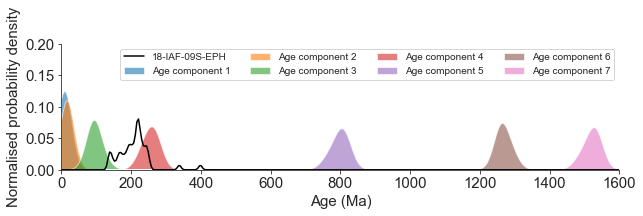

In [28]:
sns.set_style('ticks')

font= {"family": "Arial", 
      "weight": "normal",
      "size":15}

plt.rc("font", **font)

fig, ax = plt.subplots(1, 1, figsize= (9, 3))
"""
Plot
"""
#############################################
"""
Data
"""


ax.plot(grid, kde_plot(age1, grid, bandwidth = 5)/kde_plot(age1, grid, bandwidth = 5).sum(), 
                alpha = 1, color = 'k', 
               label= '18-IAF-09S-EPH')


"""
Model
"""


for i in range(7):
    

    ax.fill_between(grid, 
        kde_plot(df_age_comp_2[f'age{i+1}'].values, grid, bandwidth = 20)/kde_plot(df_age_comp_2[f'age{i+1}'], grid, bandwidth = 20).sum(),#*df_w[f'w{i+1}'].mean(axis = 0), 
                  alpha = 0.6, 
                   label = f'Age component {i+1}')




"""
Plot layout
"""
#ax.set_xlim(-100, 2300)

ax.set_ylim(0, 0.2)


"""
axis labels
"""

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Normalised probability density')

ax.legend(ncol = 4,
             fontsize = 10)




# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.locator_params(axis='x', nbins=10)
plt.tight_layout()
ax.set_xlim(0, 1600)
plt.savefig('/Users/jackcarter/Missoula/Missoula outputs/mc_eb1_out2.pdf')


In [29]:
"""
Get ages for table
"""
cwd = os.chdir('/Users/jackcarter/Missoula/Missoula outputs')
df_age_comp = pd.read_csv("mc_eb1_age_comp.csv")
df_w = pd.read_csv("mc_eb1_w_comp.csv")

In [30]:
df_age_comp.mean().sort_values()

age1             9.952516
age6            16.374212
age4            16.900086
age10           84.854073
age8            96.955235
age11          256.429146
age3           793.976134
age2           796.560214
age5           798.942684
age7          1269.126343
age9          1521.736038
Unnamed: 0    2499.500000
dtype: float64

In [31]:
df_w.mean().sort_values()

w3               0.002494
w5               0.021880
w9               0.022429
w4               0.041822
w8               0.070122
w10              0.092854
w2               0.097546
w7               0.104106
w1               0.122457
w11              0.123302
w6               0.217835
Unnamed: 0    2499.500000
dtype: float64

In [32]:
df_age_plot = pd.DataFrame({"age1":df_age_comp['age6'].values, 
                           "age2":df_age_comp['age11'].values, 
                           "age3":df_age_comp['age1'].values, 
                           "age4":df_age_comp['age7'].values, 
                           "age5":df_age_comp['age2'].values, 
                           "age6":df_age_comp['age10'].values, 
                           "age7":df_age_comp['age8'].values, 
                           "age8":df_age_comp['age4'].values, 
                           "age9":df_age_comp['age9'].values, 
                           "age10":df_age_comp['age5'].values,
                           "age11":df_age_comp['age3'].values})

In [33]:
df_w_plot = pd.DataFrame({"w1":df_w['w6'].values, 
                         "w2":df_w['w11'].values, 
                         "w3":df_w['w1'].values, 
                         "w4":df_w['w7'].values, 
                         "w5":df_w['w2'].values, 
                         "w6":df_w['w10'].values, 
                         "w7":df_w['w8'].values, 
                         "w8":df_w['w4'].values,
                          "w9":df_w['w4'].values, 
                         "w10":df_w['w9'].values,
                         "w11":df_w['w5'].values})

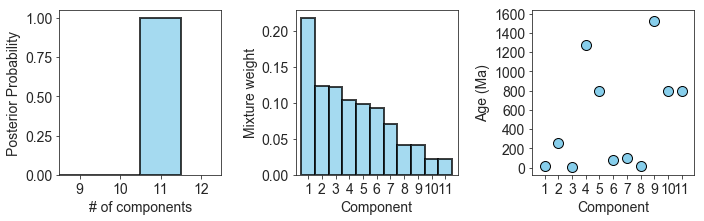

In [34]:
"""
ncmp plot
"""

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

fig, ax = plt.subplots(1, 3, figsize = (9.9, 3.3))
n_comp = np.ones(len(df_age_comp))*11

n_comp =  n_comp 
ncmp = n_comp.mean(axis = 0).astype(int)
bins = np.arange(n_comp.min() -2 , n_comp.max() + 2).astype(int)

ax[0].hist(n_comp,
        bins=bins,
        density=True,
        lw= 2,
        alpha=0.75, 
       edgecolor = 'k', 
        facecolor = 'skyblue');

ax[0].set_xticks(bins + 0.5);
ax[0].set_xticklabels(bins);
ax[0].set_xlim(bins.min(),bins.max() + 1);
ax[0].set_xlabel('# of components');



plot_w = np.arange(ncmp) + 1

for i in range(ncmp): 
    
    ax[1].bar(i+1, df_w_plot[f'w{i+1}'].values.mean(),
          width=1., lw=2, 
      edgecolor = 'k', alpha = 0.75, 
         facecolor = 'skyblue');

ax[1].set_xlabel('Component');

ax[1].set_ylabel('Mixture weight');

ax[1].locator_params(axis='x', nbins=12)


for i in range(ncmp): 
    
    ax[2].errorbar(i+1, df_age_plot[f'age{i+1}'].values.mean(),
                   yerr = 2*df_age_plot[f'age{i+1}'].values.std(), 
             fmt ='o', 
             markersize = 10, 
             markeredgecolor = 'k', 
             markerfacecolor = 'skyblue');


ax[2].set_xlabel('Component');

ax[2].set_ylabel('Age (Ma)');
ax[0].set_ylabel('Posterior Probability')

ax[2].locator_params(axis='x', nbins=ncmp + 1)
ax[2].locator_params(axis='y', nbins=ncmp + 1)
ax[2].set_xlim(0.1, ncmp + 0.9)
ax[1].set_xlim(0.1, ncmp + 0.9)
ax[1].locator_params(axis='x', nbins=ncmp + 1)



plt.tight_layout()
plt.savefig('/Users/jackcarter/Missoula/Missoula outputs/mc_eb1_ncmp_sorted.pdf')



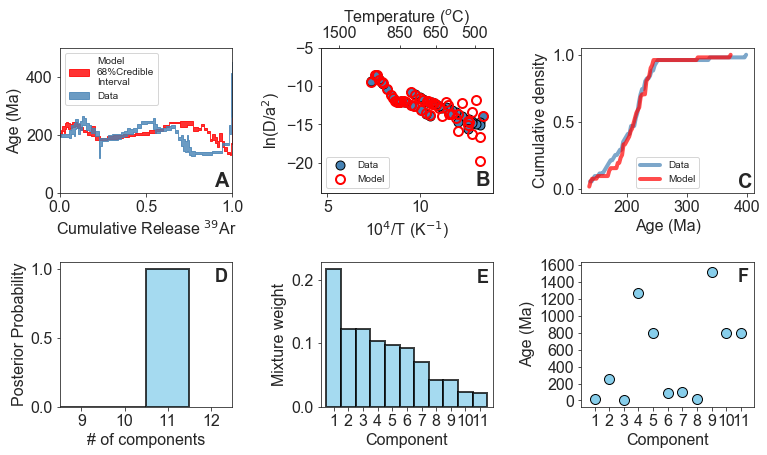

In [35]:
sns.set_style('ticks')

font= {"family": "Arial", 
      "weight": "normal",
      "size":16}

plt.rc("font", **font)


fig, ax = plt.subplots(2,3, figsize = (11, 6*1.1))

ax[0,0].fill_between(ar39_m_1, age_m_low1, 
                 age_m_high1, 
                 alpha = 0.8, 
                color = 'r', 
                label = 'Model\n68%Credible\nInterval', 
                  step = 'pre', 
                  interpolate = True,  
                  lw = 1)


ax[0,0].fill_between(ar39_plot_1, 
                age_p1 + 2*age_p_err1, 
                age_p1 - 2*age_p_err1, 
                color = 'steelblue', 
                step = 'pre', 
                    label = 'Data', 
                  alpha = 0.8)


ax[0,0].set_xlabel('Cumulative Release $^{39}$Ar')
ax[0,0].set_ylabel('Age (Ma)')




ax[0,1].plot(tplot[0:N-1], arr_data[0:N-1], 
          'o', markerfacecolor = 'steelblue', 
          markeredgecolor = 'k', 
          markersize = 9, label = 'Data')


ax[0,1].plot(tplot[0:N-1],Z1, 'or',
             markerfacecolor = 'None',
            alpha = 1, 
             markeredgecolor = 'r', markeredgewidth = 2, 
            markersize = 9, 
            label = 'Model')

ax2 = ax[0,1].twiny()

Tdc = np.array([500,  650, 850,  1500])
Tp = 10e3/(Tdc + 273.15)
labels = list(['500', '650', '850',   
              '1500'])
ax2.plot(tplot[0:N-1], arr_data[0:N-1], alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')

ax[0,1].set_xlim(Tp.min() - 1, Tp.max()+ 1)
ax2.set_xlim(Tp.min() - 1, Tp.max()+ 1)
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)
ax[0,1].set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax[0,1].set_ylabel('ln(D/a$^{2}$)')

ax[0,0].set_ylim(0, 500)
ax[0,0].set_xlim(0, 1)

ax[0,0].legend(loc = 1, fontsize = 10)
ax[0,1].legend(loc = 3, fontsize = 10)


ax[0,2].plot(bin_edges_age1[1:], cdf1/cdf1[-1], 
        label = 'Data', 
        lw = 4,
        color = 'steelblue',
        alpha = 0.7)
ax[0,2].plot(bin_edges2_ab1_m[1:], cdf1_m/cdf1_m[-1], 
        label = 'Model', 
        lw = 4,
        color = 'red',
        alpha = 0.7)

ax[0,2].legend(fontsize = 10, loc = 8)
ax[0,2].set_xlabel('Age (Ma)')
ax[0,2].set_ylabel('Cumulative density')

"""
Number of components part
"""
ax[1,0].hist(n_comp,
        bins=bins,
        density=True,
        lw= 2,
        alpha=0.75, 
       edgecolor = 'k', 
        facecolor = 'skyblue');

ax[1,0].set_xticks(bins + 0.5);
ax[1,0].set_xticklabels(bins);
ax[1,0].set_xlim(bins.min(),bins.max() + 1);
ax[1,0].set_xlabel('# of components');



plot_w = np.arange(ncmp) + 1

for i in range(ncmp): 
    
    ax[1,1].bar(i+1, df_w_plot[f'w{i+1}'].values.mean(),
          width=1., lw=2, 
      edgecolor = 'k', alpha = 0.75, 
         facecolor = 'skyblue');

ax[1,1].set_xlabel('Component');

ax[1,1].set_ylabel('Mixture weight');

ax[1,1].locator_params(axis='x', nbins=12)


for i in range(ncmp): 
    
    ax[1,2].errorbar(i+1, df_age_plot[f'age{i+1}'].values.mean(),
                   yerr = 2*df_age_plot[f'age{i+1}'].values.std(), 
             fmt ='o', 
             markersize = 10, 
             markeredgecolor = 'k', 
             markerfacecolor = 'skyblue');


ax[1,2].set_xlabel('Component');

ax[1,2].set_ylabel('Age (Ma)');
ax[1,0].set_ylabel('Posterior Probability')

ax[1,2].locator_params(axis='x', nbins=ncmp + 1)
ax[1,2].locator_params(axis='y', nbins=ncmp + 1)
ax[1,2].set_xlim(0.1, ncmp + 0.9)
ax[1,1].set_xlim(0.1, ncmp + 0.9)
ax[1,1].locator_params(axis='x', nbins=ncmp + 1)


s1 = 'A'
s2 = 'B'
s3 = 'C'
s4 = 'D'
s5 = 'E'
s6 = 'F'

ax[0,0].text(0.9, 20, s1, fontweight = 'bold', 
          fontsize = 20)

ax[0,1].text(13, -23, s2, fontweight = 'bold', 
          fontsize = 20)

ax[0,2].text(385, 0.011, s3, fontweight = 'bold', 
          fontsize = 20)

ax[1,0].text(12.6, 0.9, s4, fontweight = 'bold', 
          fontsize = 18)

ax[1,1].text(10.8, 0.195, s5, fontweight = 'bold', 
          fontsize = 18)

ax[1,2].text(10.8, 1400, s6, fontweight = 'bold', 
          fontsize = 18)

ax[0,1].set_ylim(-24, -5)
ax[0,0].legend(loc = 2, fontsize = 10)
ax[0,1].legend(loc = 3, fontsize = 10)

plt.tight_layout()
plt.savefig('mc_eb1_joint_out.pdf')

In [37]:
df_w.mean().sort_values

<bound method Series.sort_values of Unnamed: 0    2499.500000
w1               0.122457
w2               0.097546
w3               0.002494
w4               0.041822
w5               0.021880
w6               0.217835
w7               0.104106
w8               0.070122
w9               0.022429
w10              0.092854
w11              0.123302
dtype: float64>

In [ ]:
x1 = np.concatenate((df_age_comp['age6'].values, 
                    df_age_comp['age4'].values), 
                    axis = 0)

x2 = np.concatenate((df_age_comp['age10'].values, 
                    df_age_comp['age8'].values), 
                    axis = 0)


x3 = np.concatenate((df_age_comp['age3'].values, 
                    df_age_comp['age2'].values,
                    df_age_comp['age5'].values), 
                    axis = 0)

In [44]:
df_w = pd.DataFrame({"w1": df_w['w1'].values, 
                         "w2": df_w['w6'].values+ df_w['w4'].values, 
                         "w3": df_w['w10'].values+ df_w['w8'].values, 
                         "w4": df_w['w11'].values, 
                         "w5": df_w['w3'].values + df_w['w2'].values + df_w['w5'].values, 
                         "w6": df_w['w7'].values, 
                          "w7": df_w['w9'].values})

In [45]:
df_w.mean().sort_values

<bound method Series.sort_values of w1    0.122457
w2    0.259657
w3    0.162975
w4    0.123302
w5    0.121919
w6    0.104106
w7    0.022429
dtype: float64>

In [46]:
df_age_plot = pd.DataFrame({"age1": x1[-SAMPLES:], 
                           "age2": x2[-SAMPLES:], 
                           "age3": df_age_comp['age11'].values, 
                           "age4": df_age_comp['age1'].values, 
                           "age5": x3[-SAMPLES:],
                             "age6": df_age_comp['age7'].values,
                             "age7": df_age_comp['age9'].values})

In [47]:
ncmp = 7

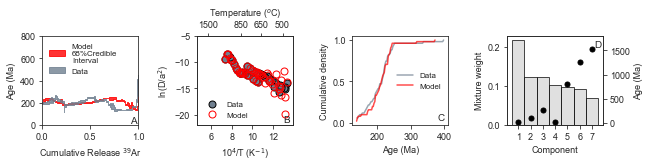

In [52]:
sns.set_style('ticks')

font= {"family": "Arial", 
      "weight": "normal",
      "size":9}

plt.rc("font", **font)


fig, ax = plt.subplots(1,4, figsize = (9.1, 2.4))

ax[0].fill_between(ar39_m_1 , age_m_low1, 
                 age_m_high1, 
                 alpha = 0.8, 
                color = 'r', 
                label = 'Model\n68%Credible\nInterval', 
                  step = 'pre', 
                   interpolate = True,  
                  lw = 1)


ax[0].fill_between(ar39_plot_1, 
                age_p1 + 2*age_p_err1, 
                age_p1 - 2*age_p_err1, 
                color = 'slategrey', 
                step = 'pre', 
                    label = 'Data', 
                  alpha = 0.8)


ax[0].set_xlabel('Cumulative Release $^{39}$Ar')
ax[0].set_ylabel('Age (Ma)')




ax[1].plot(tplot, arr_data, 
          'o', markerfacecolor = 'slategrey', 
          markeredgecolor = 'k', 
          markersize = 7, label = 'Data')


ax[1].plot(tplot[0:N-1],Z1, 'or',
             markerfacecolor = 'None',
            alpha = 1, 
             markeredgecolor = 'r', markeredgewidth = 1, 
            markersize = 7, 
            label = 'Model')


#### Temp #####

ax2 = ax[1].twiny()

Tdc = np.array([500,  650, 850,  1500])
Tp = 10e3/(Tdc + 273.15)
labels = list(['500', '650', '850',   
              '1500'])
ax2.plot(tplot, arr_data, alpha = 0)
ax2.set_xlabel('Temperature ($^{o}$C)')

ax[1].set_xlim(Tp.min() - 1, Tp.max()+ 1)
ax2.set_xlim(Tp.min() - 1, Tp.max()+ 1)
ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)



ax[1].set_xlabel('10$^{4}$/T (K$^{-1}$)')
ax[1].set_ylabel('ln(D/a$^{2}$)')
ax[1].locator_params(axis='y', nbins=6)
ax[1].locator_params(axis='x', nbins=6)


ax[0].set_ylim(0, 800)
ax[0].set_xlim(0, 1)

ax[0].legend(loc = 1, fontsize = 10)
ax[1].legend(loc = 3, fontsize = 10)


ax[2].plot(bin_edges_age1[1:], cdf1/cdf1[-1], 
        label = 'Data', 
        lw = 1.5,
        color = 'slategrey',
        alpha = 0.7)
ax[2].plot(bin_edges2_ab1_m[1:], cdf1_m/cdf1_m[-1], 
        label = 'Model', 
        lw = 1.5,
        color = 'red',
        alpha = 0.7)

ax[2].set_xlabel('Age (Ma)')
ax[2].set_ylabel('Cumulative density')

for i in range(ncmp): 
    
    ax[3].bar(i+1, df_w_plot[f'w{i+1}'].values.mean(),
          width=1., lw=1, 
      edgecolor = 'k', alpha = 0.7, 
         facecolor = 'lightgrey');

ax[3].set_xlabel('Component');

ax[3].set_ylabel('Mixture weight');

ax[3].locator_params(axis='x', nbins=12)

ax32 = ax[3].twinx()

for i in range(ncmp): 
    
    ax32.errorbar(i+1, df_age_plot[f'age{i+1}'].values.mean(),
                   yerr = 2*df_age_plot[f'age{i+1}'].values.std(), 
             fmt ='o', 
             markersize = 5, 
             markeredgecolor = 'k', 
             markerfacecolor = 'k', 
                  color = 'k');
    
ax32.set_ylabel('Age (Ma)')
ax32.set_ylim(-50, 1800)

ax[3].set_xlim(0.1, ncmp + 0.9)
ax[3].locator_params(axis='x', nbins=ncmp+ 1)

s1 = 'A'
s2 = 'B'
s3 = 'C'
s4 = 'D'

ax[0].text(0.92, 20, s1, fontweight = 'normal', 
          fontsize = 10)

ax[1].text(13, -21.5, s2, fontweight = 'normal', 
          fontsize = 10)

ax[2].text(380, 0.03, s3, fontweight = 'normal', 
          fontsize = 10)

ax[3].text(7.2, 0.2, s4, fontweight = 'normal', 
          fontsize = 10)

ax[1].set_ylim(-22, -5)
ax[0].legend(loc = 2, fontsize = 8, frameon = False)
ax[1].legend(loc = 3, fontsize = 8, frameon = False)
ax[2].legend(loc = 5, fontsize = 8, frameon = False)

plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/Missoula_paper_plots/mc_eb1_final_out.pdf')
